Step 1: Data Cleaning
You have collected your data, time to further clean it.

A cleaned dataset is a dataset that doesn't contain any duplicates, has no blank spaces, and has no other obvious errors.<br> The rest of the analysis is worthless if you neglect this step; Garbage In, Garbage Out.

Take care of the following:

- No duplicates
- No blank spaces (e.g. " I love python " => "I love python")
- No empty values (set them to None or NaN)
- No wrongly encoded values (e.g. a text value in the price column)

In [1]:
import pandas as pd
import numpy as np
import csv

C:\Users\fabie\AppData\Local\Temp\ipykernel_16544\4119871954.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Merge dataframes

In [2]:
immo_house = pd.read_csv(r"C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data\RAW\RawData_house_sale.csv")
immo_house.head()

,Unnamed: 0,url,id,region,province,locality,zip_code,Longitude,Latitude,property_type,...,surface_land,number_facades,swimming_pool,building_state,energy_type,EPC_score,EnergyConsumptionPerSqm,parking_outdoor,parking_indoor,KitchenSurface
0,0,https://www.immoweb.be/en/classified/new-real-...,9817867,Flanders,East Flanders,Hamme,9220,4.139868,51.0893257,APARTMENT_GROUP,...,Nan,Nan,NaN,Nan,Nan,Nan,Nan,NaN,NaN,Nan
1,1,https://www.immoweb.be/en/classified/apartment...,11180940,Brussels,Brussels,Molenbeek-Saint-Jean,1080,4.3042877,50.8513015,APARTMENT,...,Nan,2,False,GOOD,ELECTRIC,F,315,NaN,1.0,Nan
2,2,https://www.immoweb.be/en/classified/new-real-...,11051803,Brussels,Brussels,Ukkel,1180,4.3197984,50.7952533,APARTMENT_GROUP,...,Nan,Nan,NaN,Nan,Nan,NaN,NaN,NaN,NaN,Nan
3,3,https://www.immoweb.be/en/classified/new-real-...,11180894,Flanders,East Flanders,Zottegem,9620,3.7877384,50.8677644,APARTMENT_GROUP,...,Nan,Nan,NaN,Nan,Nan,Nan,Nan,4.0,7.0,Nan
4,4,https://www.immoweb.be/en/classified/new-real-...,11182035,Flanders,East Flanders,LIERDE,9570,NaN,NaN,HOUSE_GROUP,...,Nan,Nan,NaN,Nan,Nan,Nan,Nan,NaN,NaN,Nan


In [3]:
immo_apartment = pd.read_csv(r"C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data\RAW\RawData_apartment_sale.csv")

In [4]:
merged = pd.concat([immo_house, immo_apartment])

# write to csv
import os

path = r'C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data'
#merged.to_csv(os.path.join(path,r'RawData_merged.csv'))

#merged.to_csv("RawData_merged.csv")


## Exploring the DataFrame

In [5]:
display(immo_house.head())


,Unnamed: 0,url,id,region,province,locality,zip_code,Longitude,Latitude,property_type,...,surface_land,number_facades,swimming_pool,building_state,energy_type,EPC_score,EnergyConsumptionPerSqm,parking_outdoor,parking_indoor,KitchenSurface
0,0,https://www.immoweb.be/en/classified/new-real-...,9817867,Flanders,East Flanders,Hamme,9220,4.139868,51.0893257,APARTMENT_GROUP,...,Nan,Nan,NaN,Nan,Nan,Nan,Nan,NaN,NaN,Nan
1,1,https://www.immoweb.be/en/classified/apartment...,11180940,Brussels,Brussels,Molenbeek-Saint-Jean,1080,4.3042877,50.8513015,APARTMENT,...,Nan,2,False,GOOD,ELECTRIC,F,315,NaN,1.0,Nan
2,2,https://www.immoweb.be/en/classified/new-real-...,11051803,Brussels,Brussels,Ukkel,1180,4.3197984,50.7952533,APARTMENT_GROUP,...,Nan,Nan,NaN,Nan,Nan,NaN,NaN,NaN,NaN,Nan
3,3,https://www.immoweb.be/en/classified/new-real-...,11180894,Flanders,East Flanders,Zottegem,9620,3.7877384,50.8677644,APARTMENT_GROUP,...,Nan,Nan,NaN,Nan,Nan,Nan,Nan,4.0,7.0,Nan
4,4,https://www.immoweb.be/en/classified/new-real-...,11182035,Flanders,East Flanders,LIERDE,9570,NaN,NaN,HOUSE_GROUP,...,Nan,Nan,NaN,Nan,Nan,Nan,Nan,NaN,NaN,Nan


In [6]:
immo_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20043 entries, 0 to 20042
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               20042 non-null  object
 1   url                      19781 non-null  object
 2   id                       19781 non-null  object
 3   region                   19742 non-null  object
 4   province                 19742 non-null  object
 5   locality                 19781 non-null  object
 6   zip_code                 19781 non-null  object
 7   Longitude                16823 non-null  object
 8   Latitude                 16823 non-null  object
 9   property_type            19781 non-null  object
 10  property_subtype         19781 non-null  object
 11  price                    18827 non-null  object
 12  number_rooms             18828 non-null  object
 13  living_area              17931 non-null  object
 14  kitchen                  17569 non-nul

In [7]:
immo_house.shape

(20043, 31)

In [8]:
immo_house.describe()

,Unnamed: 0,url,id,region,province,locality,zip_code,Longitude,Latitude,property_type,...,surface_land,number_facades,swimming_pool,building_state,energy_type,EPC_score,EnergyConsumptionPerSqm,parking_outdoor,parking_indoor,KitchenSurface
count,20042,19781,19781,19742,19742,19781,19781,16823,16823,19781,...,15297,15002,6538,14470,14168,16668,16301,6977,8775,60
unique,19982,17689,17468,4,12,2732,996,12813,12813,5,...,2515,10,3,8,9,13,1143,36,38,1
top,0,https://www.immoweb.be/en/classified/new-real-...,11174342.0,Flanders,East Flanders,Gent,9000,3.6100443,50.8471537,HOUSE,...,0,2,False,GOOD,GAS,C,0,1.0,1.0,Nan
freq,2,4,3,12018,3489,400,331,69,69,15257,...,1110,6198,5942,6446,9581,3238,99,2334,6374,60


## Components of the DF

In [9]:
immo_house.values

array([['0',
        'https://www.immoweb.be/en/classified/new-real-estate-project-apartments/for-sale/hamme/9220/9817867',
        '9817867', ..., nan, nan, 'Nan'],
       ['1',
        'https://www.immoweb.be/en/classified/apartment/for-sale/molenbeek-saint-jean/1080/11180940',
        '11180940', ..., nan, '1.0', 'Nan'],
       ['2',
        'https://www.immoweb.be/en/classified/new-real-estate-project-apartments/for-sale/ukkel/1180/11051803',
        '11051803', ..., nan, nan, 'Nan'],
       ...,
       ['19978',
        'https://www.immoweb.be/en/classified/apartment/for-sale/berchem-sainte-agathe/1082/11151061',
        '11151061.0', ..., nan, '1.0', nan],
       ['19979',
        'https://www.immoweb.be/en/classified/apartment/for-sale/berchem-sainte-agathe/1082/11151060',
        '11151060.0', ..., nan, '1.0', nan],
       ['>>>>>>> 406c9e82a3d60a9ea0e9636fd5bae2e9e829d3af:data/RAW/RawData_house_sale.csv',
        nan, nan, ..., nan, nan, nan]], dtype=object)

In [10]:
immo_house.columns

Index(['Unnamed: 0', 'url', 'id', 'region', 'province', 'locality', 'zip_code',
       'Longitude', 'Latitude', 'property_type', 'property_subtype', 'price',
       'number_rooms', 'living_area', 'kitchen', 'furnished', 'fireplace',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'surface_land',
       'number_facades', 'swimming_pool', 'building_state', 'energy_type',
       'EPC_score', 'EnergyConsumptionPerSqm', 'parking_outdoor',
       'parking_indoor', 'KitchenSurface'],
      dtype='object')

In [11]:
immo_house.index


RangeIndex(start=0, stop=20043, step=1)

## Check Missing values

In [12]:
# detect missing values
immo_house.isna()
# detect any missing values
immo_house.isna().any()
# count missing values
immo_house.isna().sum()
# sort sum of missing values
missing_sorted = immo_house.isna().sum().sort_values(ascending=False)
display(missing_sorted)
display(type(missing_sorted))

KitchenSurface             19983
fireplace                  16095
garden_area                14383
garden                     13614
terrace_area               13533
swimming_pool              13505
furnished                  13271
parking_outdoor            13066
parking_indoor             11268
terrace                     9185
energy_type                 5875
building_state              5573
number_facades              5041
surface_land                4746
EnergyConsumptionPerSqm     3742
EPC_score                   3375
Longitude                   3220
Latitude                    3220
kitchen                     2474
living_area                 2112
price                       1216
number_rooms                1215
province                     301
region                       301
id                           262
locality                     262
zip_code                     262
url                          262
property_subtype             262
property_type                262
Unnamed: 0

pandas.core.series.Series

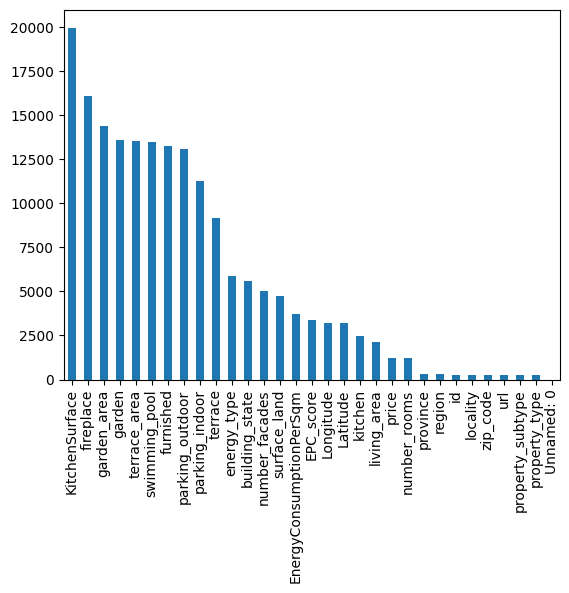

In [13]:
# Plotting missing values
import matplotlib.pyplot as plt
missing_sorted.plot(kind='bar')
plt.show()

## Remove columns

In [14]:
# Remove 6 columns that have the most missing values:
#['garden_area', 'fireplace', 'garden', 'swimming_pool', 'furnished','terrace_area']
remove_columns = missing_sorted ['garden_area':'terrace_area']
display(remove_columns)
print(type(remove_columns))


garden_area     14383
garden          13614
terrace_area    13533
dtype: int64

<class 'pandas.core.series.Series'>


In [15]:
#immo_drop = immo_df.drop(columns = [remove_columns], inplace=True)
#print(immo_drop)

In [16]:
#immo_df.drop(columns = ['garden_area', 'fireplace', 'garden', 'swimming_pool', 'furnished','terrace_area'], inplace=True)
#display(immo_df)

## Remove duplicates: there are no duplicates in the raw data

## Check for blank spaces in strings

## Check for empty values: 

In [17]:
#immo_null = immo_drop_dup.isnull() #is the same as isna()
#display(immo_null)
#immo_nan = immo_drop_dup.replace('', np.nan, inplace=False)
#display(immo_nan)

In [18]:
display(immo_house.isnull().sum().sort_values(ascending=False)) # check numbers of null value in each column
#immo_nan = immo_house.fillna("NaN") # Replace empty/null values with "NaN"
#display(immo_nan.isnull().sum()) # check numbers of null value in each column
#display(immo_nan)

KitchenSurface             19983
fireplace                  16095
garden_area                14383
garden                     13614
terrace_area               13533
swimming_pool              13505
furnished                  13271
parking_outdoor            13066
parking_indoor             11268
terrace                     9185
energy_type                 5875
building_state              5573
number_facades              5041
surface_land                4746
EnergyConsumptionPerSqm     3742
EPC_score                   3375
Longitude                   3220
Latitude                    3220
kitchen                     2474
living_area                 2112
price                       1216
number_rooms                1215
province                     301
region                       301
id                           262
locality                     262
zip_code                     262
url                          262
property_subtype             262
property_type                262
Unnamed: 0

## Remove rows with missing values

In [19]:
# Function to drop observations with missing 'id' and 'price'
def drop_missing_values(df):
    """
    Drop observations with missing values in 'id' and 'price' columns.
    Parameters:
    - df: pandas DataFrame, the DataFrame to be cleaned
    Returns:
    - pandas DataFrame, the cleaned DataFrame
    """
    # Drop missing observations for 'id' and 'price' columns
    df_cleaned = df.dropna(subset=['id', 'price', 'province', 'region'])

    # Check if there are any missing values left in 'id' and 'price' columns
    if df_cleaned['id'].isnull().any() or df_cleaned['price'].isnull().any() or df_cleaned['province'].isnull().any() or df_cleaned['region'].isnull().any():
        print("Warning: Missing values still present after dropping.")
    else:
        print("Missing values in 'id', 'price', 'province' and 'region' successfully dropped.")

    return df_cleaned

# Replace 'house' with the actual name of your DataFrame
house_cleaned = drop_missing_values(immo_house)
display(house_cleaned.head())

# Save the cleaned DataFrame as 'house_cleaned.csv' in the 'Data' folder

import os

path = r'C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data'
house_cleaned.to_csv(os.path.join(path,r'house_cleaned.csv'))
#house_cleaned.to_csv(os.path.join(data_folder, 'house_cleaned.csv'), index=False)


Missing values in 'id', 'price', 'province' and 'region' successfully dropped.


,Unnamed: 0,url,id,region,province,locality,zip_code,Longitude,Latitude,property_type,...,surface_land,number_facades,swimming_pool,building_state,energy_type,EPC_score,EnergyConsumptionPerSqm,parking_outdoor,parking_indoor,KitchenSurface
1,1,https://www.immoweb.be/en/classified/apartment...,11180940,Brussels,Brussels,Molenbeek-Saint-Jean,1080,4.3042877,50.8513015,APARTMENT,...,Nan,2,False,GOOD,ELECTRIC,F,315,NaN,1.0,Nan
9,9,https://www.immoweb.be/en/classified/apartment...,11179443,Brussels,Brussels,Forest,1190,4.3207534,50.8139605,APARTMENT,...,Nan,2,False,AS_NEW,GAS,B,75,1.0,NaN,Nan
10,10,https://www.immoweb.be/en/classified/apartment...,11179337,Brussels,Brussels,Woluwe-Saint-Lambert,1200,4.4356831,50.8402458,APARTMENT,...,Nan,2,False,AS_NEW,GAS,B,95,1.0,NaN,Nan
11,11,https://www.immoweb.be/en/classified/penthouse...,11179336,Brussels,Brussels,Woluwe-Saint-Lambert,1200,4.4356831,50.8402458,APARTMENT,...,Nan,2,False,AS_NEW,GAS,B,95,1.0,NaN,Nan
12,12,https://www.immoweb.be/en/classified/flat-stud...,11176661,Brussels,Brussels,Woluwe-Saint-Lambert,1200,4.4356593,50.8404952,APARTMENT,...,Nan,2,False,AS_NEW,GAS,B,95,NaN,NaN,Nan


## Filter the dataframe

In [20]:
print(house_cleaned['property_type'])
import pandas as pd

# Filter the DataFrame to keep only rows where the property subtype is "HOUSE"
house_cleaned1 = house_cleaned[house_cleaned['property_type'] == 'HOUSE']
house_cleaned2 = house_cleaned1[house_cleaned1['property_subtype'] != 'APARTMENT_BLOCK']

# Display the filtered DataFrame
display(house_cleaned1.head())


1        APARTMENT
9        APARTMENT
10       APARTMENT
11       APARTMENT
12       APARTMENT
           ...    
20037        HOUSE
20038        HOUSE
20039    APARTMENT
20040    APARTMENT
20041    APARTMENT
Name: property_type, Length: 18791, dtype: object


,Unnamed: 0,url,id,region,province,locality,zip_code,Longitude,Latitude,property_type,...,surface_land,number_facades,swimming_pool,building_state,energy_type,EPC_score,EnergyConsumptionPerSqm,parking_outdoor,parking_indoor,KitchenSurface
14,14,https://www.immoweb.be/en/classified/house/for...,11179375,Flanders,East Flanders,Wetteren,9230,3.8816061,50.9989612,HOUSE,...,150,3,False,TO_BE_DONE_UP,GAS,F,738,NaN,NaN,Nan
15,15,https://www.immoweb.be/en/classified/house/for...,11179569,Wallonie,Liège,Liège,4031,5.5883949,50.6134246,HOUSE,...,125,2,False,TO_RENOVATE,GAS,E,410,NaN,NaN,Nan
17,17,https://www.immoweb.be/en/classified/house/for...,11179567,Wallonie,Liège,Liege,4031,5.6051168,50.6048465,HOUSE,...,231,2,False,TO_BE_DONE_UP,GAS,D,323,NaN,1.0,Nan
18,18,https://www.immoweb.be/en/classified/house/for...,11179455,Wallonie,Liège,Seraing,4101,5.494954,50.6176389,HOUSE,...,540,3,False,TO_BE_DONE_UP,FUELOIL,E,422,NaN,NaN,Nan
19,19,https://www.immoweb.be/en/classified/house/for...,11179568,Wallonie,Liège,Liège,4030,5.6202075,50.6292157,HOUSE,...,595,4,False,TO_BE_DONE_UP,GAS,C,225,NaN,NaN,Nan


In [21]:
# Explore house_cleaned2
house_cleaned2.shape
house_cleaned2.count()
house_cleaned2.info()
house_cleaned2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 14517 entries, 14 to 20038
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               14517 non-null  object
 1   url                      14517 non-null  object
 2   id                       14517 non-null  object
 3   region                   14517 non-null  object
 4   province                 14517 non-null  object
 5   locality                 14517 non-null  object
 6   zip_code                 14517 non-null  object
 7   Longitude                12350 non-null  object
 8   Latitude                 12350 non-null  object
 9   property_type            14517 non-null  object
 10  property_subtype         14517 non-null  object
 11  price                    14517 non-null  object
 12  number_rooms             14517 non-null  object
 13  living_area              13855 non-null  object
 14  kitchen                  12651 non-null  o

,Unnamed: 0,url,id,region,province,locality,zip_code,Longitude,Latitude,property_type,...,surface_land,number_facades,swimming_pool,building_state,energy_type,EPC_score,EnergyConsumptionPerSqm,parking_outdoor,parking_indoor,KitchenSurface
count,14517,14517,14517,14517,14517,14517,14517,12350,12350,14517,...,14517,12104,5170,11403,11188,13158,12856,5989,7590,19
unique,14514,12780,12581,3,11,2501,963,9756,9753,1,...,2503,9,2,7,8,10,1115,26,25,1
top,14,https://www.immoweb.be/en/classified/villa/for...,11156124.0,Flanders,East Flanders,Gent,9000,3.6100443,50.8471537,HOUSE,...,0,4,False,GOOD,GAS,C,0,1.0,1.0,Nan
freq,2,3,3,8711,2695,222,209,35,35,14517,...,956,4502,4604,4958,7192,2568,66,1697,5452,19


## Transform /fill missing values in the numeric column with the median of each group.

In [22]:
# Function to Sort the DataFrame by the categorical column, then transform /fill missing values in the numeric column with the median of each group.

from IPython.display import display

def impute_missing_by_group_median(df, categorical_column, numeric_column):
    """
    Impute missing values in a numeric column by the median of each categorical group.
    Parameters:
        df (DataFrame): Input DataFrame.
        categorical_column (str): Name of the categorical column for grouping.
        numeric_column (str): Name of the numeric column with missing values to be imputed.
    Returns:
        DataFrame: DataFrame with missing values imputed by group median.
    """
    # Check if the specified columns exist in the DataFrame
    if categorical_column not in df.columns or numeric_column not in df.columns:
        print(f"Error: One or more specified columns not found in the DataFrame.")
        return df

    # Sort DataFrame by the categorical column
    df_sorted = df.sort_values(by=categorical_column)

    # Print the summary of 'living_area' by 'number_rooms' before imputation
    summary_before = df_sorted.groupby(categorical_column)[numeric_column].describe()
    print(f"\nSummary of '{numeric_column}' by '{categorical_column}' before imputation:")
    display(summary_before)

    # Print the number of missing values before imputation
    missing_values_before = df_sorted[numeric_column].isna().sum()
    print(f"Number of missing values in '{numeric_column}' before imputation: {missing_values_before}")

    # Impute missing values by group median
    df_imputed = df_sorted.copy()
    df_imputed[numeric_column] = df_sorted.groupby(categorical_column)[numeric_column].transform(lambda x: x.fillna(x.median()))

    # Print the number of missing values after imputation
    missing_values_after = df_imputed[numeric_column].isna().sum()
    print(f"Number of missing values in '{numeric_column}' after imputation: {missing_values_after}")

    # Display the summary of 'living_area' by 'number_rooms' after imputation
    summary_after = df_imputed.groupby(categorical_column)[numeric_column].describe(include='all')
    print(f"\nSummary of '{numeric_column}' by '{categorical_column}' after imputation:")
    display(summary_after)

    # Display the resulting DataFrame for 'number_rooms' = 1 after imputation
    result_df = df_imputed[df_imputed[categorical_column] == 1][['number_rooms', numeric_column]]
    display(result_df)

    return df_imputed

# Example usage:
# Assuming df_filtered is your DataFrame and you want to impute missing values in 'living_area' by 'number_rooms'
house_imputed = impute_missing_by_group_median(house_cleaned2, categorical_column='number_rooms', numeric_column='living_area')


Summary of 'living_area' by 'number_rooms' before imputation:


,count,unique,top,freq
number_rooms,,,,
0.0,102,82,1000.0,3
1.0,201,94,75.0,8
10.0,27,21,395.0,3
11.0,11,8,1250.0,4
12.0,13,12,505.0,2
13.0,5,5,352.0,1
14.0,3,3,1240.0,1
15.0,6,2,650.0,5
16.0,3,3,705.0,1


Number of missing values in 'living_area' before imputation: 662


TypeError: Cannot convert ['635.0' '635.0' '249.0' '145.0' '390.0' '325.0' nan '380.0' nan nan
 '800.0' '467.0' '300.0' '170.0' '250.0' '220.0' '307.0' '135.0' '255.0'
 '475.0' '300.0' '87.0' '415.0' '405.0' nan '841.0' nan '140.0' '111.0'
 '870.0' '370.0' '348.0' nan '303.0' '360.0' '333.0' '180.0' '230.0'
 '260.0' '30.0' '1000.0' '1000.0' nan nan '1000.0' '83.0' '609.0' '235.0'
 '128.0' '1100.0' '300.0' '200.0' nan '870.0' '280.0' '105.0' nan '1400.0'
 nan '222.0' nan '190.0' nan '561.0' '87.0' '207.0' '415.0' '325.0'
 '247.0' '850.0' nan '246.0' '400.0' '134.0' '351.0' '513.0' '425.0'
 '145.0' '200.0' '143.0' nan '307.0' '1479.0' nan '930.0' nan '561.0' nan
 '340.0' '140.0' '220.0' '326.0' '322.0' '3995.0' '610.0' '378.0' '406.0'
 '40.0' '104.0' '785.0' '917.0' '538.0' nan nan '213.0' '1500.0' '141.0'
 nan '326.0' '150.0' '673.0' nan nan '67.0' '495.0' '133.0' '495.0'
 '170.0' nan '120.0' nan '241.0' '520.0' '280.0' '67.0' '139.0' '439.0'] to numeric

## Check for Unique or missing values

### Analysis of parking_indoor, parking_outdoor, surface_land, number_facades, surface_land

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

parking_indoor = analyze_column(immo_house, "parking_indoor")


In [ ]:
def plot_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column_name, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels by 45 degrees
    plt.tight_layout()  # Adjust layout to prevent overlapping,
    plt.show()

# parking_indoor = plot_histogram(immo_house, "parking_outdoor")

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

parking_outdoor = analyze_column(immo_house, "parking_outdoor")

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

number_facades = analyze_column(immo_house, "number_facades")

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

price = analyze_column(immo_house, "price")

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

surface_land = analyze_column(immo_house, "surface_land")

In [ ]:
#showing outliers
def scatter_plot(data, column_name):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=house_cleaned, x=column_name, y="price", color='skyblue')
        plt.title(f'Scatter Plot of {column_name}')
        plt.xlabel(f'{column_name}')
        plt.ylabel('price')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#number_facades = scatter_plot(house_cleaned, "parking_outdoor")

## Show and remove outliers

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats

cols = ["number_rooms", "living_area", "fireplace", "terrace_area", 
           "garden_area", "surface_land", "number_facades", "EnergyConsumptionPerSqm", 
           "parking_outdoor", "parking_indoor"]

for col in cols:
    # Calculate the z-score for col in cols
    z = np.abs(stats.zscore(house_cleaned2[col]))

    # Identify outliers with a z-score greater than 3
    threshold = 3
    outliers = house_cleaned2[z > threshold]

    # drop rows containing outliers
    house_cleaned_outliers = house_cleaned2.drop(outliers.index)

    # replace outliers with median value
    house_cleaned_median = house_cleaned2.loc[z > threshold, col] = house_cleaned2[col].median()

# calculate IQR for col in cols
for col in cols:
    Q1 = house_cleaned2[col].quantile(0.25)
    Q3 = house_cleaned2[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col,':', IQR)

# identify outliers
threshold = 1.5
outliers = house_cleaned2[(house_cleaned2[col] < Q1 - threshold * IQR) | (house_cleaned2[col] > Q3 + threshold * IQR)]


In [ ]:
house_cleaned2.boxplot(column=['surface_land'], by='price')

In [ ]:
for col in cols:
    hist = px.histogram(house_cleaned_outliers, x=col, y='price')
    hist.show()

In [ ]:
for col in cols:
    box = px.box(house_cleaned_outliers, y=col)
    box.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

cols = ["number_rooms", "living_area", "fireplace", "terrace_area", 
           "garden_area", "surface_land", "number_facades", "EnergyConsumptionPerSqm", 
           "parking_outdoor", "parking_indoor"]
for col in cols:
    scatter = px.scatter(house_cleaned2, x='property_subtype', y=col)
    scatter.show()

In [ ]:
scatter = px.scatter(house_cleaned, x='property_subtype', y='price')
scatter.show()

In [ ]:
def remove_outliers_zscore(df, column_name, threshold=3):
    """
    Remove outliers from a DataFrame based on the Z-score method.

    Parameters:
        df (DataFrame): Input DataFrame.
        column_name (str): Name of the column containing the data points.
        threshold (float): Z-score threshold for identifying outliers. Default is 3.

    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Calculate Z-scores for the specified column
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    
    # Create a mask to identify outliers
    outlier_mask = np.abs(z_scores) > threshold
    
    print(outlier_mask)

    # Remove outliers from the DataFrame
    #df_filtered = df[~outlier_mask]

    #return df_filtered

#remove_outliers_zscore(house_cleaned, "parking_indoor")

In [ ]:
# detect missing values
house_cleaned2.isna()
# detect any missing values
house_cleaned2.isna().any()
# count missing values
house_cleaned2.isna().sum()
# sort sum of missing values
missing_sorted = house_cleaned2.isna().sum().sort_values(ascending=False)
display(missing_sorted)
display(type(missing_sorted))

## Histogram: price, surface_land

In [ ]:
print(house_cleaned2['surface_land'])
hist = px.histogram(house_cleaned_outliers, x='surface_land', y='price')
hist.show()
hist = px.histogram(house_cleaned_outliers, x='living_area', y='price')
hist.show()

## visualize_price_correlation_heatmap

In [ ]:
def visualize_price_correlation_heatmap(df, subtype='HOUSE'):
    """
    Visualize the correlation between 'price' and other numeric columns using a heatmap for a specific property subtype.

    Parameters:
        df (DataFrame): Input DataFrame.
        subtype (str): Property subtype to filter the DataFrame (default: 'house').
    """
    # Filter DataFrame by property subtype
    subset_df = df[df['property_subtype'] == subtype]

    # Select only numeric columns
    numeric_df = subset_df.select_dtypes(include='number')

    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation between 'price' and other numeric columns for {subtype}S")
    plt.show()

# Assuming 'house_cleaned2' is your DataFrame
visualize_price_correlation_heatmap(house_cleaned2)

## Some graphs

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x="living_area", y="price", data=house_cleaned2)
plt.show()

# customize the scatter plot
# Set the palette using the name of a palette:
sns.set_palette("tab10")
sns.scatterplot(x="surface_land", y="price", hue="region", palette="colorblind", data=house_cleaned2)

# add labels and title
plt.xlabel("Surface land")
plt.ylabel("Price")
plt.title("Relationship between Surface land and Price")

# display the plot
plt.show()

In [ ]:
sns.barplot(house_cleaned2, x="price", y="building_state", hue="region", palette="tab10")
plt.xlabel('Price in €')
plt.title("Relationship between Building state and Price")

In [ ]:
#sns.pairplot(house_cleaned2, hue="property_subtype", palette="tab10")

In [ ]:
list = ['region', 'province', 'price', 'property_type', 'property_subtype']
compare = ['number_rooms', 'living_area', 'fireplace', 'terrace_area', 'garden_area', 
           'surface_land', 'number_facades', 'energy_type', 'EPC_score',
           'EnergyConsumptionPerSqm', 'parking_outdoor', 'parking_indoor']



In [ ]:
#pair = sns.pairplot(house_cleaned2[['number_rooms', 'living_area', 'kitchen', 'furnished', 'fireplace', 'terrace',
           #'terrace_area', 'garden', 'garden_area', 'surface_land', 'number_facades',
           #'swimming_pool', 'building_state', 'energy_type', 'EPC_score',
           #'EnergyConsumptionPerSqm', 'parking_outdoor', 'parking_indoor']], diag_kind="hist")
#pair.show()

In [ ]:
column_name = list(house_cleaned.columns)
display(column_name)
